## 概率统计方法

### 简介

**Python**中常用的统计工具有**Numpy, Pandas, PyMC, StatsModels**等。

**Scipy**中的子库scipy.stats中包含很多统计上的方法。

导入numpy和matplotlib：

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

Numpy自带简单的统计方法：

In [4]:
print('mean, ',heights.mean())
print("min, ",heights.min())
print("max, ", heights.max())
print("standard deviation, ", heights.std())

mean,  1.756
min,  1.46
max,  2.01
standard deviation,  0.150811140172


导入**Scipy**的统计模块：

In [16]:
import scipy.stats.mstats as st

_（scipy的官方网站上并未找到stats.stats,倒是可以看到stats.mstats，但是两个都可以运行，计算结果也基本相同，只是精度略有差异，猜测是版本升级了，保持了兼容性）_

其他统计量：

In [20]:
#print("median, ", st.nanmedian(heights))  #忽略nan直之后的中位数,mstats和stats中都没有此函数
print("median, ", st.hdmedian(heights))     
print("mode, ", st.mode(heights))         #众数及其出现次数
print("skewness, ", st.skew(heights))     #偏度
print("kurtosis, ", st.kurtosis(heights)) #峰度
print("and so many more ...")

median,  1.7706890443882266
mode,  ModeResult(mode=array([ 1.88]), count=array([ 2.]))
skewness,  -0.3935244564726434
kurtosis,  -0.330672097724
and so many more ...


### 概率分布

常见的[连续概率分布]()有：

* 均匀分布
* 正态分布
* 学生t分布
* F分布
* Gamma分布
* ...

[离散概率分布]()：

* 伯努利分布
* 几何分布
* ...

真写都可以在scipy.stats中找到。

### 连续分布

#### 正态分布

以[正态分布]()为例，先导入正态分布：

In [23]:
from scipy.stats import norm

它包含撕裂常用的函数：

* norm.cdf 返回对应的[累计分布函数]()值
* norm.pdf 返回对应的[概率密度函数]()值
* norm.rvs 产生指定参数的随机变量
* norm.fit 返回给定数据下，各参数的[最大似然估计]()（MLE）值

从正态分布产生500个随机点：

In [25]:
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

直方图：

counts,  [   6.   18.   46.   87.  114.  106.   66.   33.   20.    4.]
bin centers [ -2.87236110e+00  -2.29750217e+00  -1.72264324e+00  -1.14778432e+00
  -5.72925387e-01   1.93354108e-03   5.76792469e-01   1.15165140e+00
   1.72651033e+00   2.30136925e+00   2.87622818e+00]


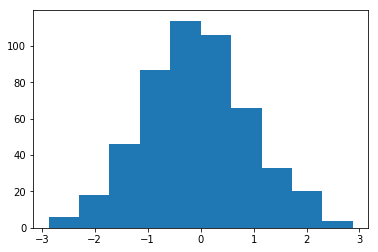

In [26]:
h = hist(x_norm)
print("counts, ", h[0])
print("bin centers", h[1])

归一化直方图（用出现频率代替次数），将划分区间变为20（默认10）：

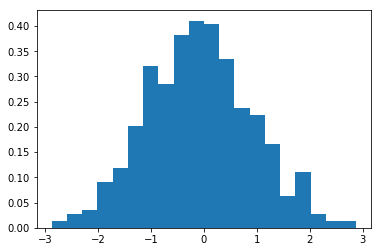

In [30]:
h = hist(x_norm, normed=True, bins=20)

在这组数据下，正态分布参数的最大似然估计为：

In [31]:
x_mean, x_std = norm.fit(x_norm)

print("mean, ", x_mean)
print("x_std, ", x_std)

mean,  -0.0811321693573
x_std,  1.00425322577


将真实的概率密度函数与直方图进行比较：

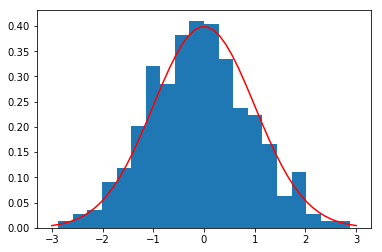

In [33]:
h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

导入积分函数：

In [34]:
from scipy.integrate import trapz

通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2


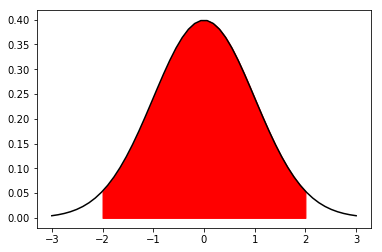

In [35]:
x1 = linspace(-2, 2, 108)
p = trapz(norm.pdf(x1), x1)
print("{:.2%} of the values lie between -2 and 2".format(p))

fill_between(x1, norm.pdf(x1), color="red")
plot(x, norm.pdf(x), "k-")

默认情况，正态分布的参数为均值0， 标准差1， 即标准正态分布。

可以通过loc和scale来调整这些参数，一种方法是调用相关函数是进行输入：

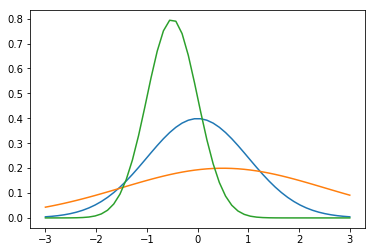

In [38]:
p = plot(x, norm.pdf(x, loc=0,scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=0.5))

另一种则是将loc， scale作为参数直接输出给norm生成相应的分布：

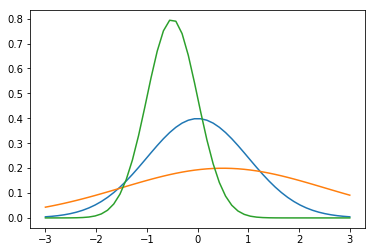

In [41]:
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

#### 其他连续分布

In [42]:
from scipy.stats import lognorm, t, dweibull

支持与norm类似的操作，如概率密度函数等。

不同参数的正态分布：

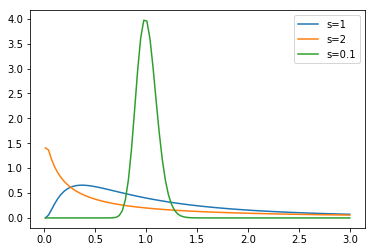

In [43]:
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

不同的韦氏分布：

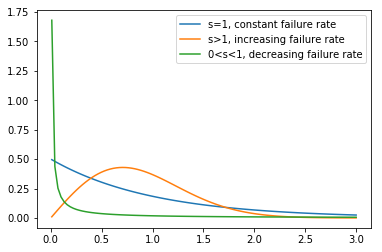

In [54]:
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

不同自由度的学生t分布：

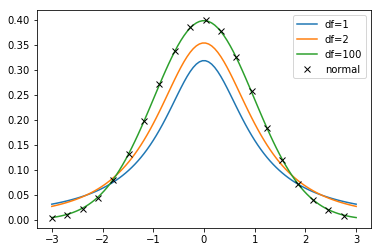

In [57]:
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]),'kx',label='normal')

legend()

### 离散分布

导入离散分布：

In [58]:
from scipy.stats import binom, poisson, randint

离散分布没有概率密度函数，但是有概率质量函数。

离散均匀分布的概率质量函数（PMF）：

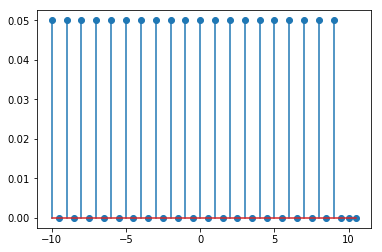

In [59]:
high = 10
low  =-10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x))  #杆状图

二项分布：

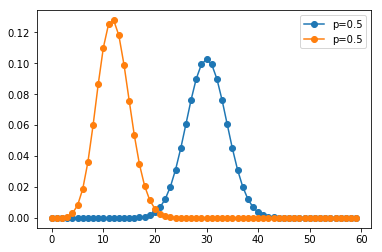

In [62]:
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.5')

legend()

泊松分布：

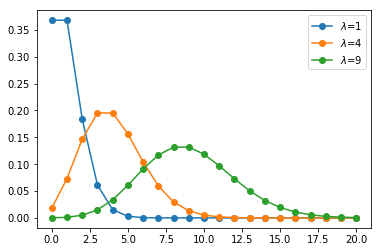

In [63]:
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

### 自定义离散分布

导入要用的函数：

In [64]:
from scipy.stats import rv_discrete

一个不均匀的骰子对应的离散值及其概率：

In [65]:
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

定义离散分布：

In [66]:
loaded = rv_discrete(values=(xk, pk))

此时，loaded可以当作一个离散分布的模块来使用。

产生两个服从该分布的随机变量：

In [73]:
loaded.rvs(size=2)

array([2, 1])

产生100个随机变量，将直方图与概率质量函数进行比较：

<Container object of 3 artists>

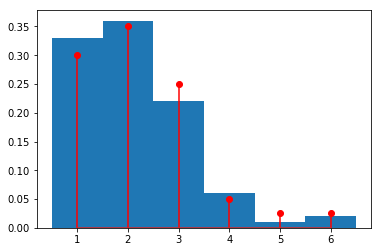

In [75]:
samples = loaded.rvs(size=100)
bins = linspace(.5, 6.5, 7)

hist(samples, bins=bins, normed=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

### 假设检验

导入相关的函数：

* 正态分布
* 独立双样本t检验，配对样本t检验，单样本t检验
* 学生t分布

t检验的相关内容清参考：

* 百度百科-t检验： http://baike.baidu.com/view/557340.htm
* 维基百科-学生t检验： https://en.wikipedia.org/wiki/Student%27s_t-test

In [76]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

#### 独立样本t检验

两组参数不同的正态分布：

In [77]:
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

从分布中产生两座随机样本：

In [78]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

将两组样本混合在一起：

In [79]:
samples = hstack((n1_samples, n2_samples))

最大似然参数估计：

In [80]:
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

比较：

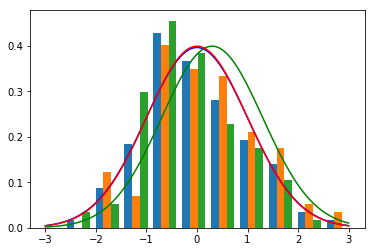

In [81]:
x = linspace(-3, 3, 100)

hist([samples, n1_samples, n2_samples], normed=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')

独立双样本t检验的目的在于判断两组样本之间是否有显著差异：

In [83]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = 2.65767231825411
p-value = 0.008510812113041624


p值小，说明这两个样本有显著性差异。

#### 配对样本t检验

配对样本指的是两组样本之间的元素一一对应，例如，假设我们有一组病人的数据：

In [85]:
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

经过某种治疗后，对这组病人得到一组新的数据：

In [86]:
effect = norm(loc=0.05, scale=0.2)
eff = pre_treat.rvs(size=pop_size)

n1 = n0 + eff

新数据的最大似然估计：

In [87]:
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

画图：

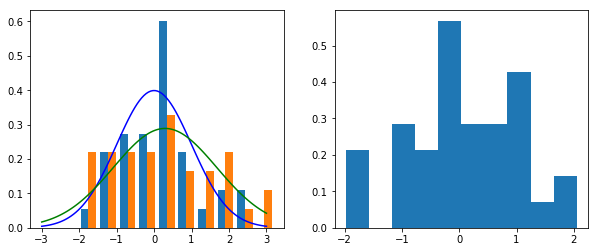

In [88]:
fig = figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0,n1], normed=True)
p = ax1.plot(x,pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, normed=True)

独立t检验：

In [90]:
t_val, p = ttest_ind(n0, n1)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = -0.2754659560825072
p-value = 0.7837936226686364


高p值说明两组样本之间没有显著性差异。

配对t检验：

In [91]:
t_val, p = ttest_rel(n0, n1)

print('t = {}'.format(t_val))
print("p-valeu = {}".format(p))

t = -0.47879866413471844
p-valeu = 0.6351468049335368


配对t检验的结果说明，配对样本之间存在显著性差异，说明治疗是有效的，符合我们的预期。

#### p值计算原理

p值对应的部分是下图中的红色区域，边界范围由t值决定。

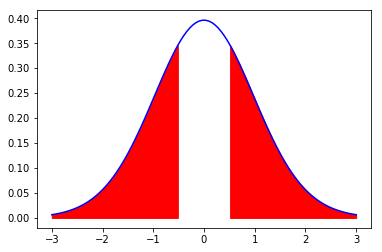

In [92]:
my_t = t(pop_size) #传入参数为自由度，这里自由度为50

p = plot(x, my_t.pdf(x), 'b-')
lower_x = x[x <= -abs(t_val)]
upper_x = x[x >= abs(t_val)]

p = fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = fill_between(upper_x, my_t.pdf(upper_x), color='red')